In [1]:
import osmnx as ox
import networkx as nx

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/osmnx/convert.py:6: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/lat

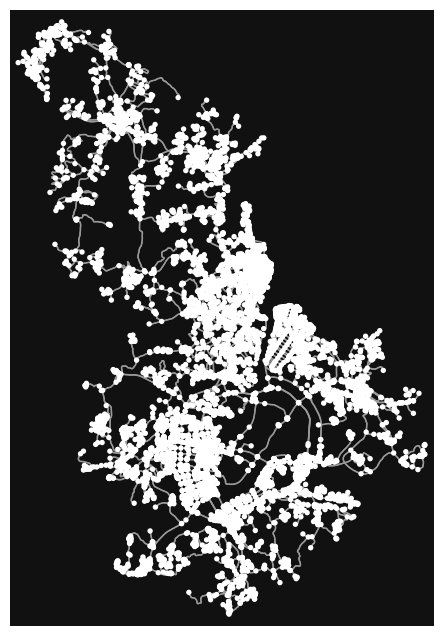

In [2]:
G = ox.graph_from_place("Sejong, Korea", network_type = "drive")
fig, ax = ox.plot_graph(G)

# Routing

In [3]:
# impute missing edge speed and calculate edge travel times
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [4]:
orig = ox.distance.nearest_nodes(G, X=127.34920, Y=36.52611)
dest = ox.distance.nearest_nodes(G, X=127.28971, Y=36.47725)

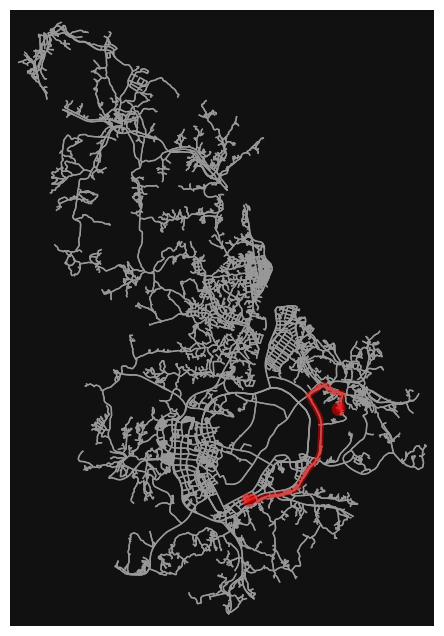

In [5]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [7]:
route_time = sum(ox.routing.route_to_gdf(G, route, weight="travel_time")["travel_time"])
route_time/60

11.693333333333337

In [8]:
ox.routing.route_to_gdf(G, route, weight="travel_time")

,,,osmid,oneway,name,highway,reversed,length,geometry,speed_kph,travel_time,tunnel,lanes,ref,bridge
u,v,key,,,,,,,,,,,,,
1905251965,1905252091,0,180087336,False,태산로,residential,True,97.489,"LINESTRING (127.34986 36.52595, 127.34998 36.5...",36.1,9.7,NaN,NaN,NaN,NaN
1905252091,1905252184,0,180087336,False,태산로,residential,True,50.962,"LINESTRING (127.35091 36.52619, 127.35109 36.5...",36.1,5.1,NaN,NaN,NaN,NaN
1905252184,1905252223,0,180087385,False,태산로,residential,False,28.991,"LINESTRING (127.35124 36.52650, 127.35133 36.5...",36.1,2.9,NaN,NaN,NaN,NaN
1905252223,408913828,0,34874742,False,태산로,tertiary,True,53.036,"LINESTRING (127.35154 36.52657, 127.35153 36.5...",44.2,4.3,NaN,NaN,NaN,NaN
408913828,408913825,0,34874742,False,태산로,tertiary,True,63.268,"LINESTRING (127.35151 36.52705, 127.35155 36.5...",44.2,5.2,NaN,NaN,NaN,NaN
408913825,1905252715,0,34874742,False,태산로,tertiary,True,125.145,"LINESTRING (127.35172 36.52759, 127.35182 36.5...",44.2,10.2,NaN,NaN,NaN,NaN
1905252715,4725654208,0,34874742,False,태산로,tertiary,True,5.865,"LINESTRING (127.35170 36.52869, 127.35170 36.5...",44.2,0.5,NaN,NaN,NaN,NaN
4725654208,4725654258,0,34874742,False,태산로,tertiary,True,160.114,"LINESTRING (127.35170 36.52875, 127.35167 36.5...",44.2,13.0,NaN,NaN,NaN,NaN
4725654258,4721941859,0,34874742,False,태산로,tertiary,True,152.655,"LINESTRING (127.35164 36.53018, 127.35168 36.5...",44.2,12.4,NaN,NaN,NaN,NaN
